In [ ]:
## BE 2100: Final Project Code: DESCRIPTIVE ANALYTICS:

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
col_names = ['Age','Sex','Chest Pain Type','BP','Cholesterol','FBS Over 120','EKG Results','Max HR','Exercise Angina','ST Depression','Slope of ST','Number of Vessels Fluro','Thallium','Heart_Disease']
# load dataset
Heart = pd.read_csv("C:\\Desktop\\Heart_Disease_Prediction.csv", header=None, names=col_names)

In [4]:
Heart.head(10)
# Initial Breakdown of our data

,Age,Sex,Chest Pain Type,BP,Cholesterol,FBS Over 120,EKG Results,Max HR,Exercise Angina,ST Depression,Slope of ST,Number of Vessels Fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


In [5]:
Heart.describe()

,Age,Sex,Chest Pain Type,BP,Cholesterol,FBS Over 120,EKG Results,Max HR,Exercise Angina,ST Depression,Slope of ST,Number of Vessels Fluro,Thallium,Heart_Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest Pain Type'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FBS Over 120'}>,
        <Axes: title={'center': 'EKG Results'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercise Angina'}>,
        <Axes: title={'center': 'ST Depression'}>,
        <Axes: title={'center': 'Slope of ST'}>,
        <Axes: title={'center': 'Number of Vessels Fluro'}>],
       [<Axes: title={'center': 'Thallium'}>,
        <Axes: title={'center': 'Heart_Disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

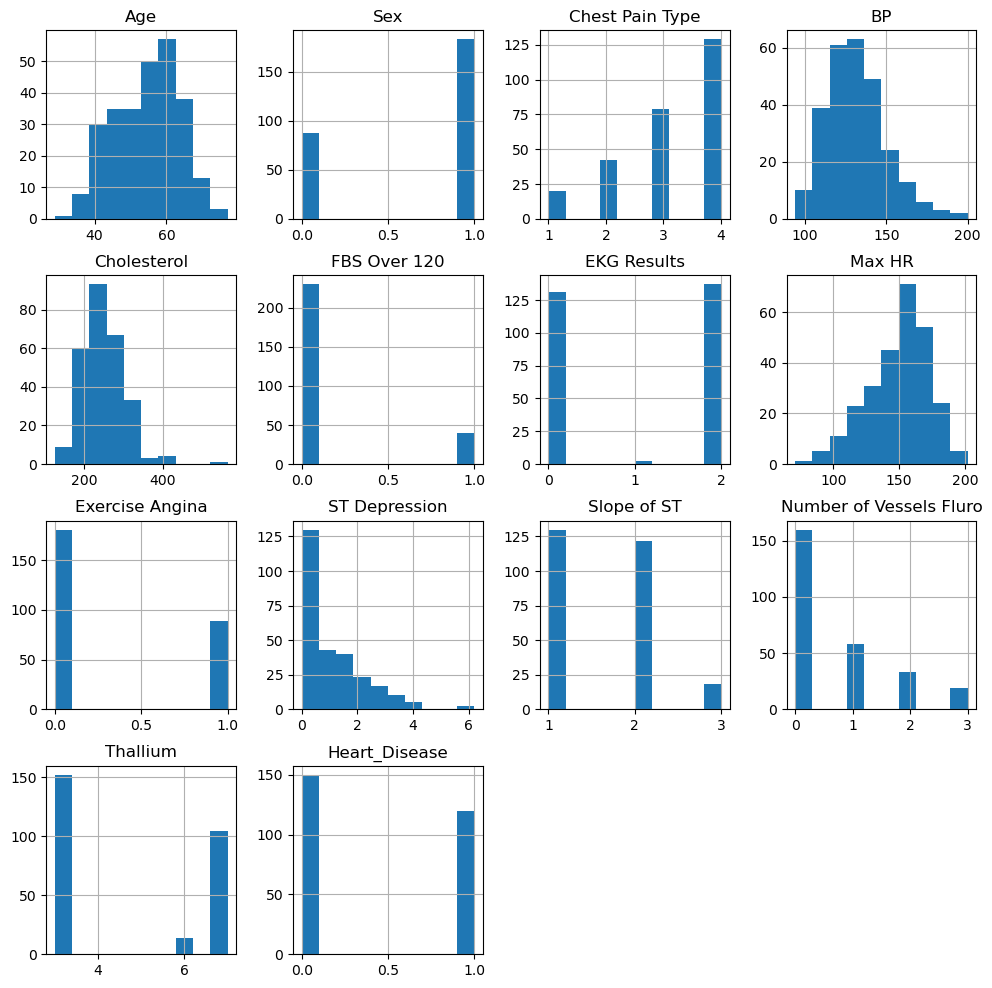

In [6]:
#Creating histograms for each variable
Heart.hist(figsize = (12, 12))

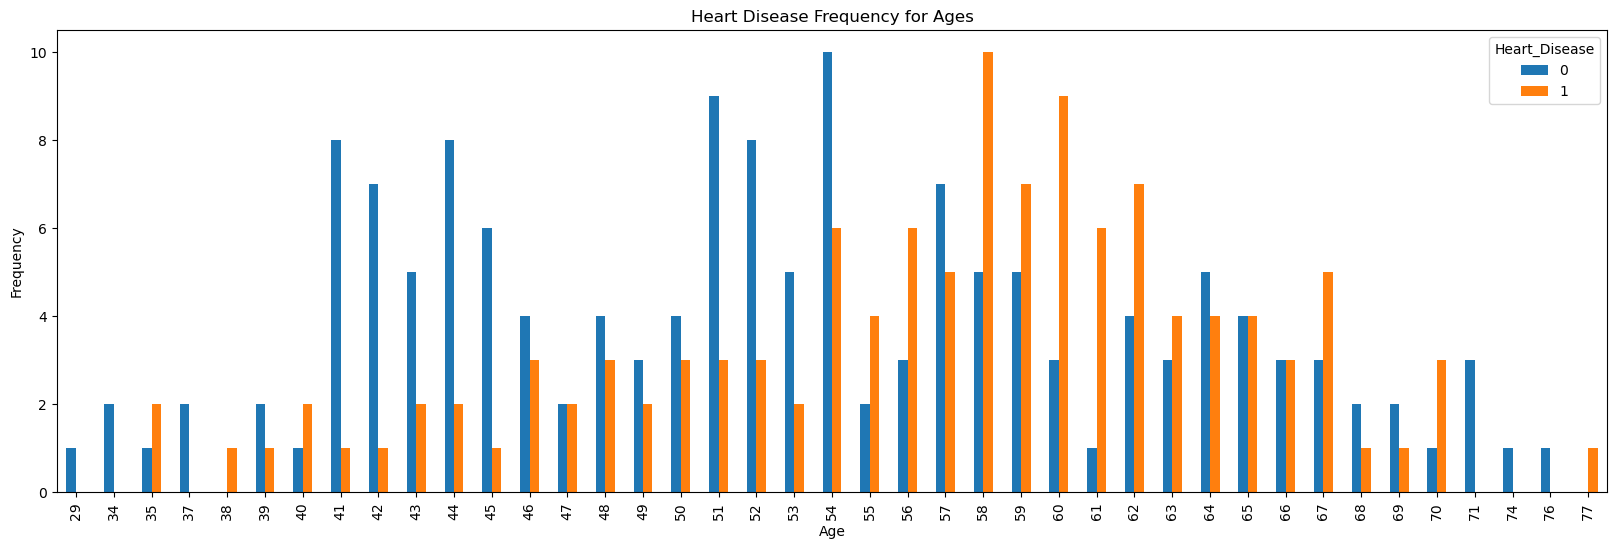

In [7]:
#Heart disease frequency chart for ages 29 - 77
#At age => 55 the frequency is higher for heart disease
pd.crosstab(Heart.Age,Heart.Heart_Disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Correlation Table
Heart.corr()

,Age,Sex,Chest Pain Type,BP,Cholesterol,FBS Over 120,EKG Results,Max HR,Exercise Angina,ST Depression,Slope of ST,Number of Vessels Fluro,Thallium,Heart_Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest Pain Type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS Over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG Results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise Angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST Depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


<Axes: >

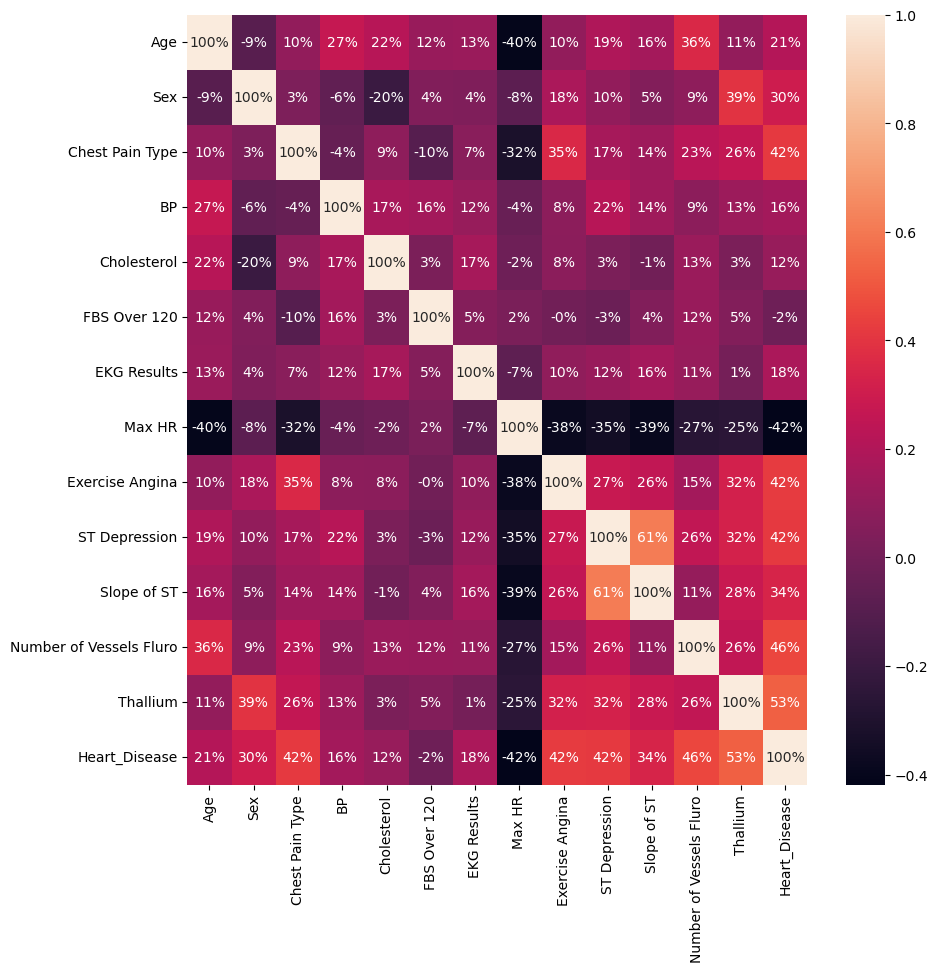

In [9]:
#Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Heart.corr(), annot=True, fmt='.0%')

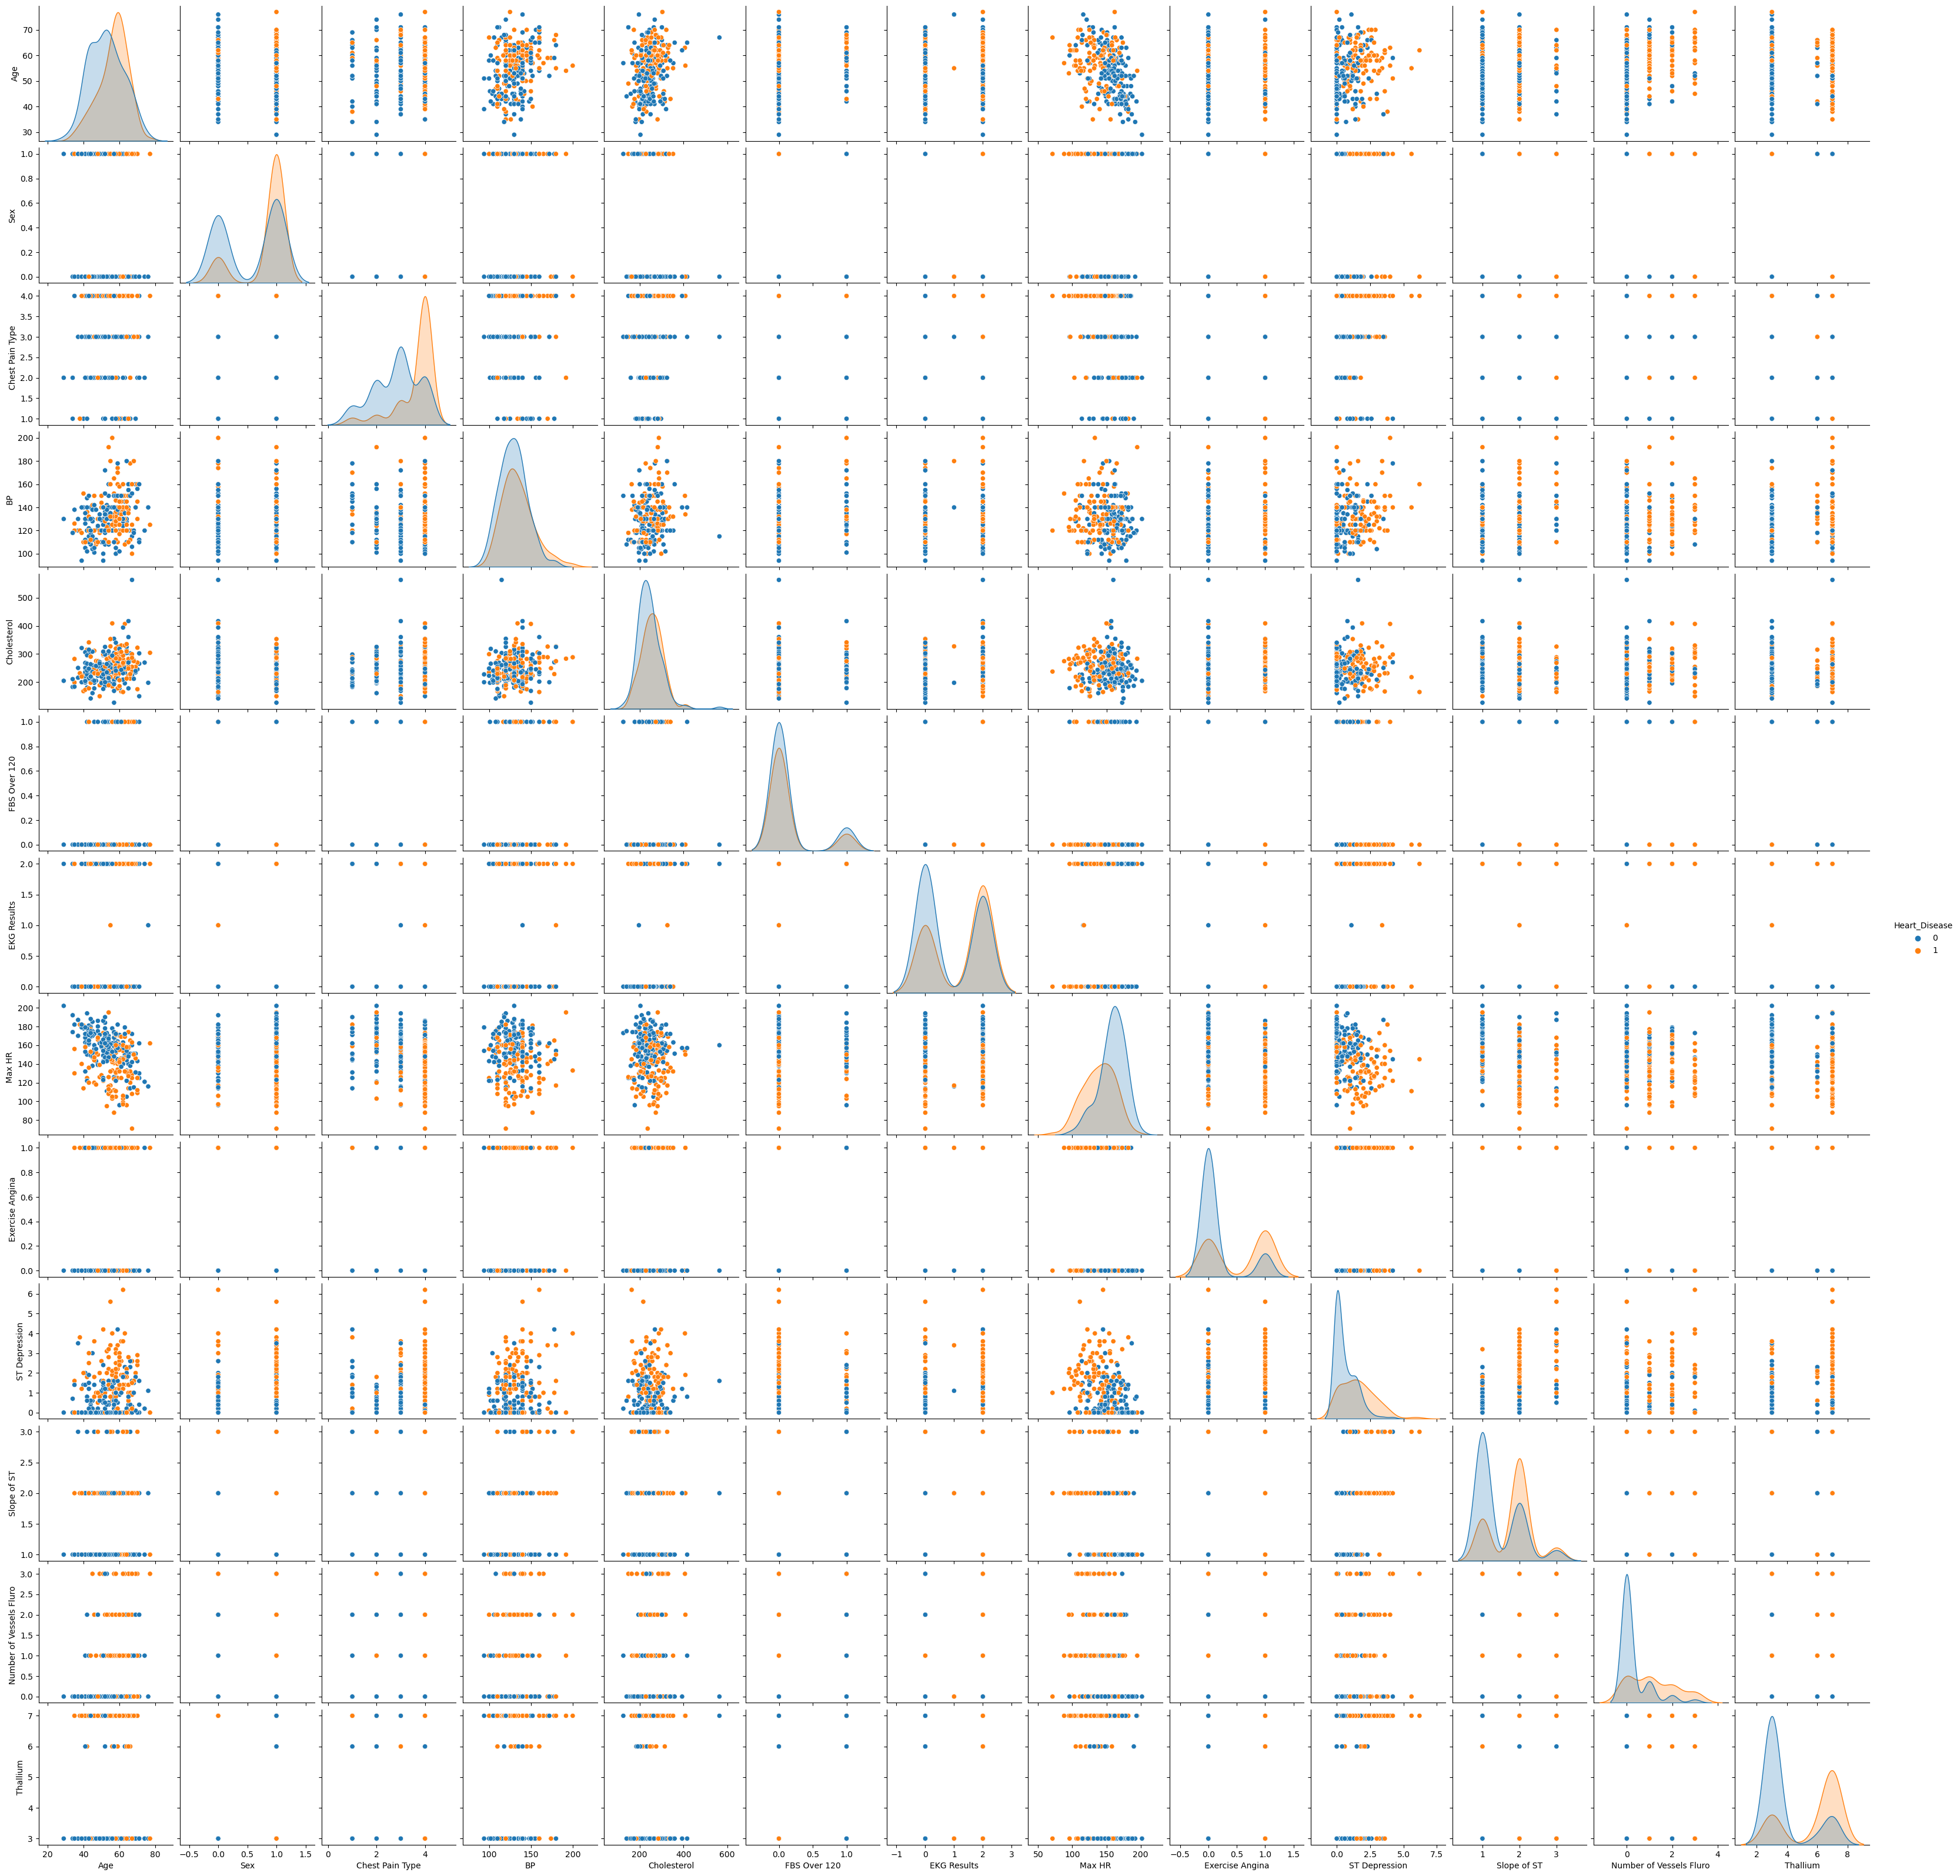

In [10]:
#Pair plot

sns.pairplot(Heart.iloc[:,0:14], hue='Heart_Disease')

<Axes: xlabel='Chest Pain Type', ylabel='Cholesterol'>

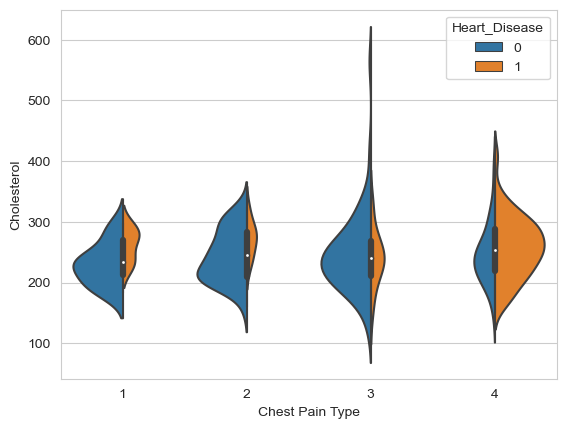

In [51]:
sns.violinplot(Heart, x = 'Chest Pain Type', y = 'Cholesterol', hue = 'Heart_Disease', split = True, scale = 'count')

<Axes: xlabel='Chest Pain Type', ylabel='Age'>

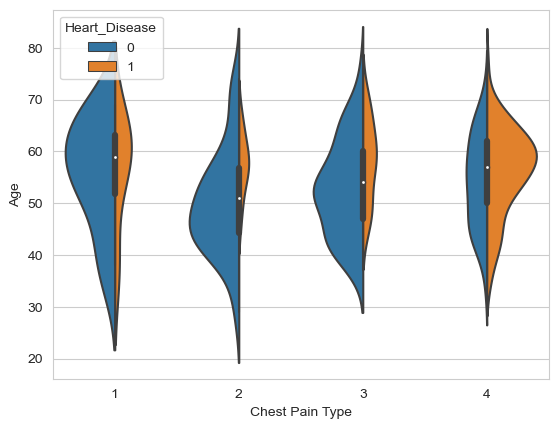

In [37]:
sns.violinplot(Heart, x = 'Chest Pain Type', y = 'Age', hue = 'Heart_Disease', split = True, scale = 'count')

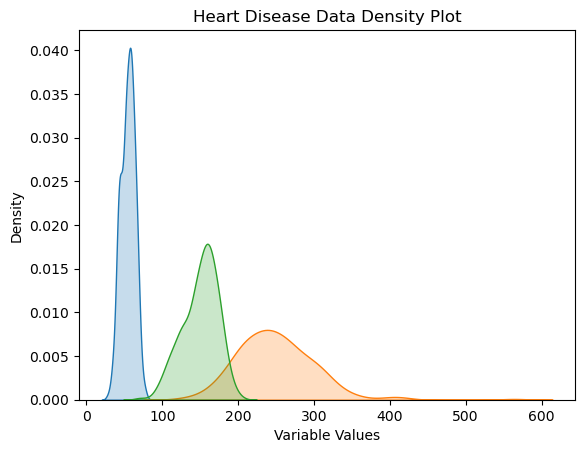

In [29]:
sns.kdeplot(data=Heart['Age'], label='Age',fill = True)
sns.kdeplot(data=Heart['Cholesterol'], label='Cholesterol' ,fill = True)
sns.kdeplot(data=Heart['Max HR'], label='Max Heart Rate', fill=True)
plt.xlabel('Variable Values')
plt.ylabel('Density')
plt.title('Heart Disease Data Density Plot')
plt.show()